# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 52,000 Animation Movie Details (2024)

https://www.kaggle.com/datasets/asaniczka/52000-animation-movie-details-dataset-2024

### Who, What, How

Who: Animation film producers and marketers seeking insights into genre popularity and revenue trends.

What: Analyze the relationship between movie genres and their average revenues to identify which genres are most profitable.

How: Create a bar chart displaying average revenues per genre, highlighting the top-performing genres.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
import kagglehub
import os

In [3]:
path = kagglehub.dataset_download("asaniczka/52000-animation-movie-details-dataset-2024")
csv_file_path = os.path.join(path, "animation_movies.csv")
df = pd.read_csv(csv_file_path)
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

### 3.1. Check for Duplicate Rows

In [4]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


### 3.2 Check for Duplicate Values in Key Column

In [5]:
duplicate_titles = df['title'].duplicated().sum()
print(f"Duplicate titles: {duplicate_titles}")

Duplicate titles: 2563


### 3.3 Mean, Median, and Mode of Numeric Columns

In [6]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    print(f"{col} → Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode}")

id → Mean: 618812.16, Median: 611915.00, Mode: 12
vote_average → Mean: 2.60, Median: 0.00, Mode: 0.0
vote_count → Mean: 40.40, Median: 0.00, Mode: 0
revenue → Mean: 1863464.11, Median: 0.00, Mode: 0
runtime → Mean: 20.90, Median: 7.00, Mode: 0
budget → Mean: 575951.29, Median: 0.00, Mode: 0
popularity → Mean: 1.89, Median: 0.60, Mode: 0.6


### 3.4. Identify Missing or Null Values

In [7]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64


### 3.5 Inconsistent Data 

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

inconsistent_dates = df[df['release_date'].dt.year < 1900]
print("Movies with release dates before 1900:")
print(inconsistent_dates[['title', 'release_date']])

Movies with release dates before 1900:
                        title release_date
1716             Poor Pierrot   1892-10-28
2365      Autour d’une cabine   1894-12-15
3329          L'Homme Machine   1885-01-01
4025      The Musician Monkey   1878-05-07
4592        The Magic Rosette   1878-05-07
4984       Matches: An Appeal   1899-01-01
6252       Clown and His Dogs   1892-10-28
6767              A Good Beer   1892-10-28
7015          Le Jeu de Corde   1878-05-07
7018          Zim, Boum, Boum   1878-05-07
8489      Dancing on the Rope   1878-05-07
8510           L'Équilibriste   1878-05-07
9757            Les Papillons   1878-05-07
9758               Le Trapèze   1878-05-07
9759             La Charmeuse   1878-05-07
9760            La Balançoire   1878-05-07
9761                Le Fumeur   1878-05-07
9763         Le Jeu du Volant   1878-05-07
9772               La Nageuse   1878-05-07
9774         Le Steeple-chase   1878-05-07
9781             The Aquarium   1878-05-07
9855           

### 3.6 Encode Categorical Variables

In [9]:
if 'original_language' in df.columns:
    df_encoded = pd.get_dummies(df, columns=['original_language'])
else:
    df_encoded = df.copy()


In [10]:
print(df_encoded.head())

       id         title  vote_average  vote_count    status release_date  \
0  150540    Inside Out         7.922       19463  Released   2015-06-09   
1   14160            Up         7.949       18857  Released   2009-05-28   
2      12  Finding Nemo         7.824       18061  Released   2003-05-30   
3  354912          Coco         8.222       17742  Released   2017-10-27   
4   10681        WALL·E         8.078       17446  Released   2008-06-22   

     revenue  runtime  adult                     backdrop_path  ...  \
0  857611174       95  False  /j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg  ...   
1  735099082       96  False  /hGGC9gKo7CFE3fW07RA587e5kol.jpg  ...   
2  940335536      100  False  /h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg  ...   
3  800526015      105  False  /askg3SMvhqEl4OL52YuvdtY40Yb.jpg  ...   
4  521311860       98  False  /fK5ssgvtI43z19FoWigdlqgpLRE.jpg  ...   

   original_language_tl original_language_tr original_language_uk  \
0                 False                False   

In [11]:
print(df_encoded.columns.tolist())

['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'original_language_ab', 'original_language_af', 'original_language_am', 'original_language_ar', 'original_language_as', 'original_language_az', 'original_language_be', 'original_language_bg', 'original_language_bn', 'original_language_bo', 'original_language_bs', 'original_language_ca', 'original_language_ch', 'original_language_cn', 'original_language_cr', 'original_language_cs', 'original_language_cy', 'original_language_da', 'original_language_de', 'original_language_dz', 'original_language_el', 'original_language_en', 'original_language_es', 'original_language_et', 'original_language_eu', 'original_language_fa', 'original_language_fi', 'original_language_fr', 'original_language_ga', 'or

In [12]:
encoded_language_columns = [col for col in df_encoded.columns if col.startswith('original_language_')]
print(f'Number of encoded language columns: {len(encoded_language_columns)}')
print(encoded_language_columns)
# Check for missing values in the encoded DataFrame
missing_values_encoded = df_encoded.isnull().sum()
print("Missing values in the encoded DataFrame:")
print(missing_values_encoded[missing_values_encoded > 0])
# Check for duplicate rows in the encoded DataFrame
duplicate_rows_encoded = df_encoded.duplicated().sum()
print(f"Duplicate rows in the encoded DataFrame: {duplicate_rows_encoded}")
# Check for duplicate titles in the encoded DataFrame
duplicate_titles_encoded = df_encoded['title'].duplicated().sum()
print(f"Duplicate titles in the encoded DataFrame: {duplicate_titles_encoded}")
# Check for numeric columns in the encoded DataFrame
numeric_cols_encoded = df_encoded.select_dtypes(include='number').columns
print("Numeric columns in the encoded DataFrame:")
print(numeric_cols_encoded)
# Check for non-numeric columns in the encoded DataFrame
non_numeric_cols_encoded = df_encoded.select_dtypes(exclude='number').columns
print("Non-numeric columns in the encoded DataFrame:")
print(non_numeric_cols_encoded)
            

Number of encoded language columns: 102
['original_language_ab', 'original_language_af', 'original_language_am', 'original_language_ar', 'original_language_as', 'original_language_az', 'original_language_be', 'original_language_bg', 'original_language_bn', 'original_language_bo', 'original_language_bs', 'original_language_ca', 'original_language_ch', 'original_language_cn', 'original_language_cr', 'original_language_cs', 'original_language_cy', 'original_language_da', 'original_language_de', 'original_language_dz', 'original_language_el', 'original_language_en', 'original_language_es', 'original_language_et', 'original_language_eu', 'original_language_fa', 'original_language_fi', 'original_language_fr', 'original_language_ga', 'original_language_gd', 'original_language_gl', 'original_language_gn', 'original_language_ha', 'original_language_he', 'original_language_hi', 'original_language_hr', 'original_language_ht', 'original_language_hu', 'original_language_hy', 'original_language_id',

Duplicate rows in the encoded DataFrame: 0
Duplicate titles in the encoded DataFrame: 2563
Numeric columns in the encoded DataFrame:
Index(['id', 'vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity'],
      dtype='object')
Non-numeric columns in the encoded DataFrame:
Index(['title', 'status', 'release_date', 'adult', 'backdrop_path', 'homepage',
       'imdb_id', 'original_title', 'overview', 'poster_path',
       ...
       'original_language_tl', 'original_language_tr', 'original_language_uk',
       'original_language_ur', 'original_language_uz', 'original_language_vi',
       'original_language_xx', 'original_language_yi', 'original_language_zh',
       'original_language_zu'],
      dtype='object', length=117)


# Conclusions

**Are the data usable?**  
Yes, after cleaning and encoding, the dataset is suitable for analysis.

**Do we need to modify or correct it?**  
Yes. We handled missing values, removed duplicates, and checked for invalid dates.

**Is there any class imbalance?**  
We can check genre distribution:

In [13]:
genre_counts = df['genres'].value_counts()
print("Genre distribution:")
print(genre_counts)

Genre distribution:
genres
Animation                                             28393
Animation, Comedy                                      2514
Animation, Family                                      2247
Family, Animation                                       831
Documentary, Animation                                  793
                                                      ...  
Animation, Fantasy, Horror, Music                         1
Music, Animation, Comedy, Family, Fantasy                 1
Romance, Animation, Action, Crime                         1
Animation, Comedy, Drama, Fantasy, Mystery, Horror        1
Drama, Comedy, Documentary, History, Animation            1
Name: count, Length: 2649, dtype: int64


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

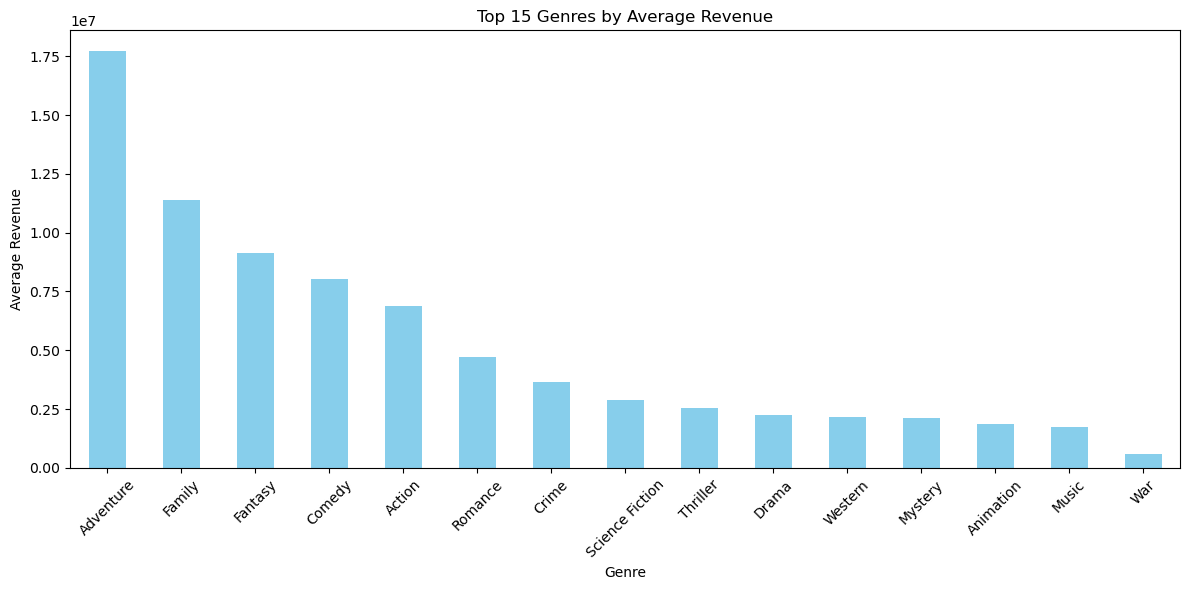

In [14]:
import matplotlib.pyplot as plt

# Clean and explode genres column
df_cleaned = df.copy()
df_cleaned['genres'] = df_cleaned['genres'].astype(str)
df_cleaned['genres'] = df_cleaned['genres'].str.split(', ')
df_exploded = df_cleaned.explode('genres')

# Calculate average revenue per genre
avg_revenue_per_genre = df_exploded.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# Plot top N genres
top_n = 15

plt.figure(figsize=(12, 6))
avg_revenue_per_genre.head(top_n).plot(kind='bar', color='skyblue')

plt.title('Top 15 Genres by Average Revenue')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Scatterplot Example: budget vs. revenue

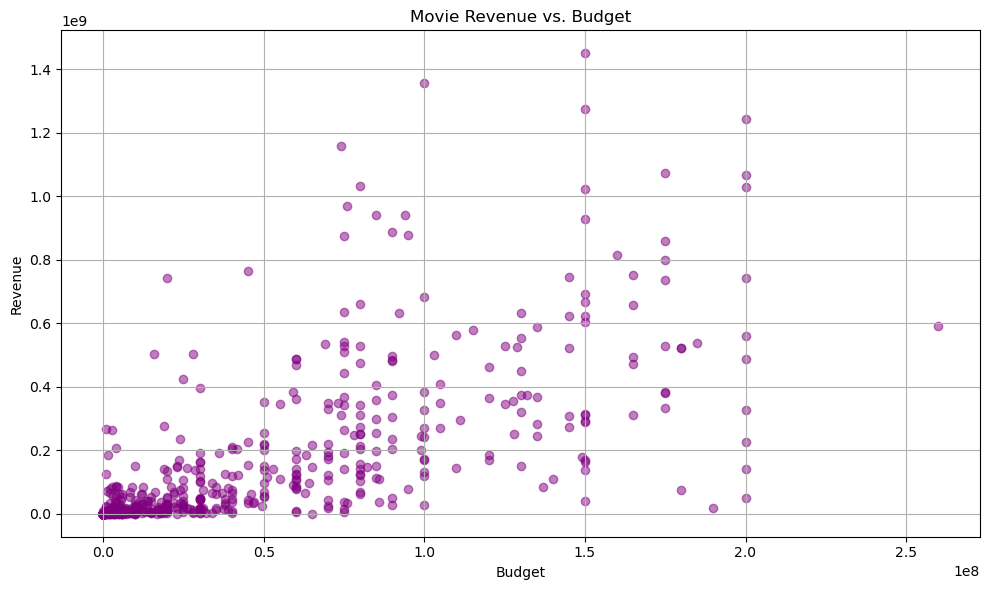

In [15]:
import matplotlib.pyplot as plt

# Remove rows with missing or zero values
scatter_df = df[(df['budget'] > 0) & (df['revenue'] > 0)]


plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['budget'], scatter_df['revenue'], alpha=0.5, color='purple')

plt.title('Movie Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


# Linear Regression in Sklearn: Predicting Revenue from Budget

Prepare the data

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Drop rows with missing or zero values for budget or revenue
df_lr = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

# Reshape budget (1 feature) for sklearn
X = df_lr[['budget']].values  # 2D array
y = df_lr['revenue'].values   # 1D array

Train the linear regression model

In [17]:
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercept (a) = {intercept:,.2f}')
print(f'Slope (b)     = {slope:,.2f}')


Intercept (a) = 5,681,721.71
Slope (b)     = 3.21


Visualize the regression line

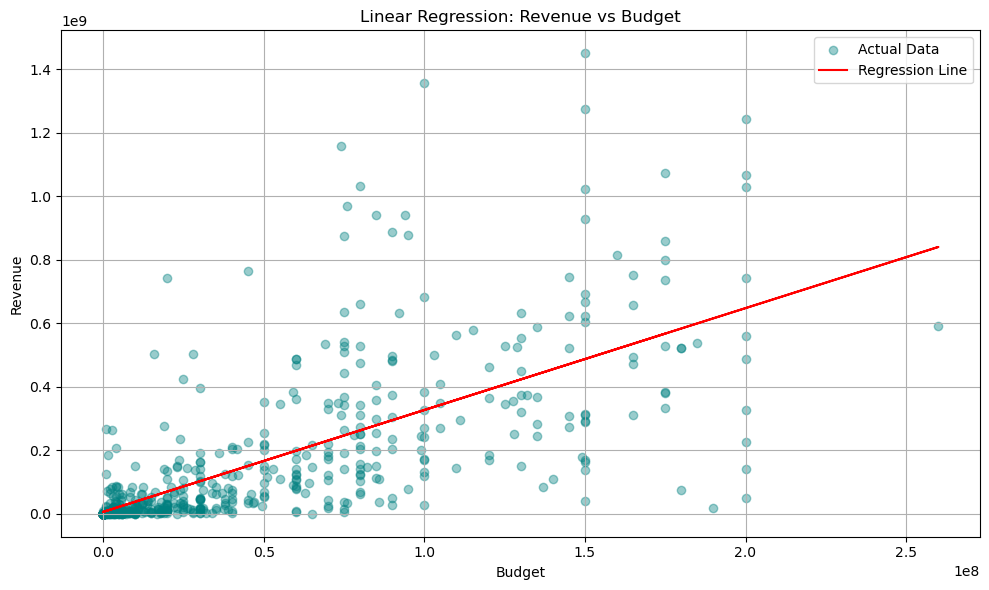

In [18]:
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.4, label='Actual Data', color='teal')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Evaluate model performance

In [19]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'MSE  = {mse:,.2f}')
print(f'RMSE = {rmse:,.2f}')
print(f'MAE  = {mae:,.2f}')
print(f'R²   = {r2:.4f}')


MSE  = 26,703,563,237,894,972.00
RMSE = 163,412,249.35
MAE  = 87,519,148.02
R²   = 0.5113


###  Multiple Linear Regression with Sklearn

Select and clean the data

In [20]:
# Multi-variable regression

features = ['budget', 'popularity', 'runtime']
target = 'revenue'

df_multi = df[features + [target]].dropna()
df_multi = df_multi[(df_multi['budget'] > 0) & (df_multi['revenue'] > 0)]

X_multi = df_multi[features].values  
y_multi = df_multi[target].values    


Train the model

In [21]:
from sklearn.linear_model import LinearRegression

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

print("Intercept:", model_multi.intercept_)
print("Coefficients:", model_multi.coef_)
print(f"→ budget coef:     {model_multi.coef_[0]:,.2f}")
print(f"→ popularity coef: {model_multi.coef_[1]:,.2f}")
print(f"→ runtime coef:    {model_multi.coef_[2]:,.2f}")


Intercept: -5369287.34189108
Coefficients: [2.96955620e+00 5.17081858e+05 8.51952989e+04]
→ budget coef:     2.97
→ popularity coef: 517,081.86
→ runtime coef:    85,195.30


 Predict and evaluate performance

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_multi = model_multi.predict(X_multi)

mse_multi = mean_squared_error(y_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_multi, y_pred_multi)
r2_multi = r2_score(y_multi, y_pred_multi)

print(f"MSE   = {mse_multi:,.2f}")
print(f"RMSE  = {rmse_multi:,.2f}")
print(f"MAE   = {mae_multi:,.2f}")
print(f"R²    = {r2_multi:.4f}")


MSE   = 25,886,653,211,421,128.00
RMSE  = 160,893,297.60
MAE   = 85,245,739.78
R²    = 0.5263


Check feature importance

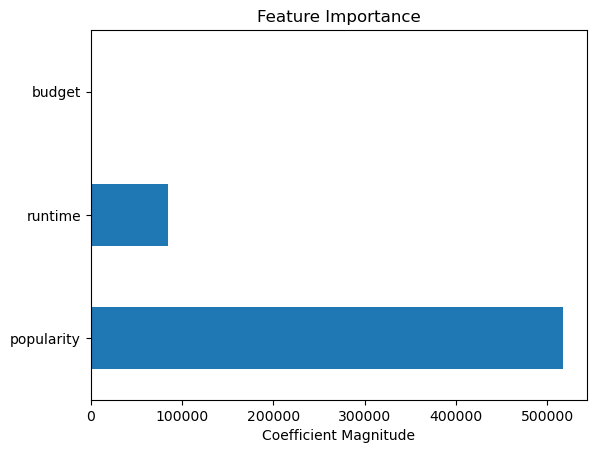

In [23]:
# Feature importance using absolute values
importance = pd.Series(np.abs(model_multi.coef_), index=features)
importance.sort_values(ascending=False).plot(kind='barh', title='Feature Importance')
plt.xlabel("Coefficient Magnitude")
plt.show()